In [1]:
from personalinking import collapse_data, txt_dict, usr_bow


usrsA = collapse_data(txt_dict("data/usersAFiltered.txt"))
usrsB = collapse_data(txt_dict("data/usersBFiltered.txt"))
postsA = usr_bow(txt_dict("data/postsAFiltered.txt"))
postsB = usr_bow(txt_dict("data/postsBFiltered.txt"))

In [2]:
from personalinking import gen_neg_pairs, gen_pos_pairs


X_pos = gen_pos_pairs("data/16_9_matches_j.txt", postsA, postsB, usrsA, usrsB) 
Y_pos = [1 for i in X_pos]
X_neg = gen_neg_pairs("data/16_9_matches_j.txt", postsA, postsB, usrsA, usrsB)
Y_neg = [0 for i in X_neg]

X = X_pos + X_neg
Y = Y_pos + Y_neg



In [3]:
import numpy as np

X = np.asarray(X)

In [4]:
from sklearn.utils import shuffle

X, Y= shuffle(X, Y)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

classifier = RandomForestClassifier()
cv = 5
scores = cross_val_score(classifier, X[:, :], Y, cv=cv)

In [6]:
tot = 0
for score in  scores:
    tot += score
    
print tot/cv

0.920650850436


# ROC CURVE

/usr/lib64/python2.7/site-packages/matplotlib/axes.py:4602: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


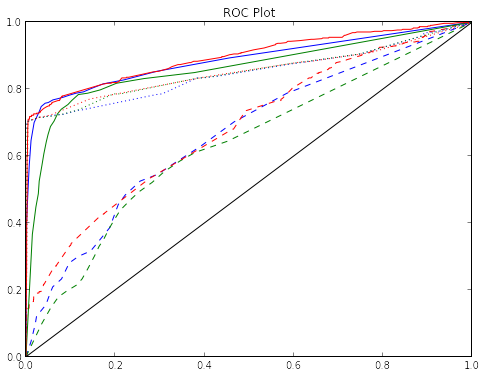

In [7]:
%matplotlib inline
from sklearn import metrics
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier

import matplotlib.lines as mlines

plt.figure(figsize=(8,6))

X = np.asarray(X)
Y = np.asarray(Y)

Xt = X[:, 2:]

classifier = RandomForestClassifier(n_estimators=20, n_jobs=10)

classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.roc_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr, ls='--')

classifier = ExtraTreesClassifier(n_estimators=20, n_jobs=10)

X = np.asarray(X)
Y = np.asarray(Y)

classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.roc_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr, ls ='--')

classifier = AdaBoostClassifier(n_estimators=20)

X = np.asarray(X)
Y = np.asarray(Y)

classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.roc_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr, ls ='--')



Xt = X[:, :]

classifier = RandomForestClassifier(n_estimators=20, n_jobs=10)


classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.roc_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr, color='b' )

classifier = ExtraTreesClassifier(n_estimators=20, n_jobs=10)


classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.roc_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr,color='g' )

classifier = AdaBoostClassifier(n_estimators=20)



classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.roc_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr,color='r',  )


Xt = X[:, :2]

classifier = RandomForestClassifier(n_estimators=20, n_jobs=10)


classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.roc_curve(Y[300:], scores[:, 1:])


blue_line, = plt.plot(fpr, tpr, color='b' , ls =':' )

classifier = ExtraTreesClassifier(n_estimators=20, n_jobs=10)



classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.roc_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr,color='g' ,ls =':')

classifier = AdaBoostClassifier(n_estimators=20)


classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.roc_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr,color='r', ls=':' )

plt.legend(handles=[blue_line], loc='best')
plt.title("ROC Plot")

plt.plot([0,1], [0,1], color='black'  )

plt.show()


# PR Curve

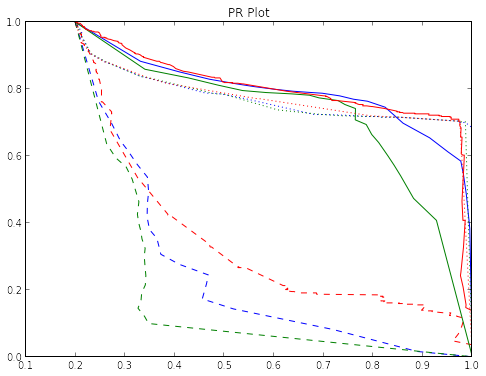

In [8]:
%matplotlib inline
from sklearn import metrics
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier

import matplotlib.lines as mlines

plt.figure(figsize=(8,6))

X = np.asarray(X)
Y = np.asarray(Y)

Xt = X[:, 2:]

classifier = RandomForestClassifier(n_estimators=20, n_jobs=10)

classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.precision_recall_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr, ls='--')

classifier = ExtraTreesClassifier(n_estimators=20, n_jobs=10)

X = np.asarray(X)
Y = np.asarray(Y)

classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.precision_recall_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr, ls ='--')

classifier = AdaBoostClassifier(n_estimators=20)

X = np.asarray(X)
Y = np.asarray(Y)

classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.precision_recall_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr, ls ='--')



Xt = X[:, :]

classifier = RandomForestClassifier(n_estimators=20, n_jobs=10)


classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.precision_recall_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr, color='b' )

classifier = ExtraTreesClassifier(n_estimators=20, n_jobs=10)


classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.precision_recall_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr,color='g' )

classifier = AdaBoostClassifier(n_estimators=20)



classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.precision_recall_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr,color='r',  )


Xt = X[:, :2]

classifier = RandomForestClassifier(n_estimators=20, n_jobs=10)


classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.precision_recall_curve(Y[300:], scores[:, 1:])


blue_line, = plt.plot(fpr, tpr, color='b' , ls =':' )

classifier = ExtraTreesClassifier(n_estimators=20, n_jobs=10)



classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.precision_recall_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr,color='g' ,ls =':')

classifier = AdaBoostClassifier(n_estimators=20)


classifier.fit(Xt[:300 , :], Y[ :300])
scores = classifier.predict_proba(Xt[ 300:, :])
fpr, tpr, threshold = metrics.precision_recall_curve(Y[300:], scores[:, 1:])


plt.plot(fpr, tpr,color='r', ls=':' )

plt.legend(handles=[blue_line], loc='best')
plt.title("PR Plot")


plt.show()
